In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.processing import *

# Teste 1: Leitor da Biblia


## Processamento

#### Imagem Original

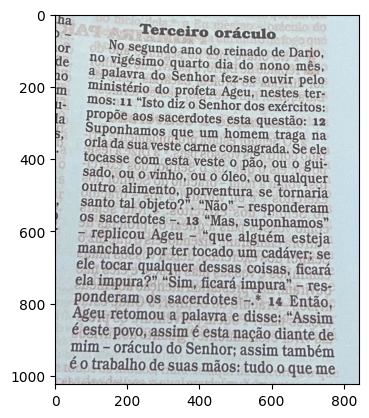

In [3]:
img = lerImagem("data\images\Biblia2.jpg")
mostrar(img)

### Imagem pré processada

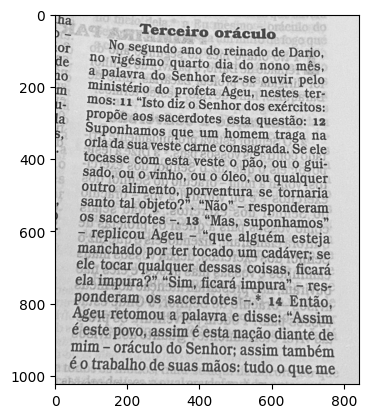

In [4]:
imgCinza = escalaCinza(img)
mostrar(imgCinza)

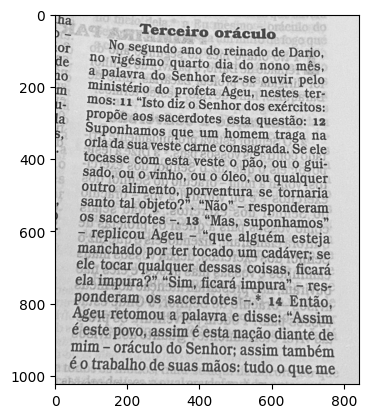

In [5]:

gauss = gaussiano(imgCinza, 1, 1)

mostrar(gauss)

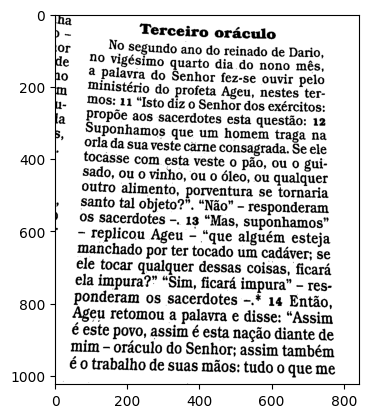

In [6]:
imgTrasholding = thresholding(gauss)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholding)

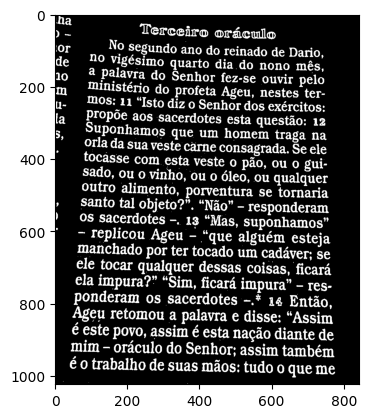

In [7]:
imgTrasholdingGauss = thresholdingGaussiano(imgTrasholding)
#thres = gaussian_thresholding(grey)

mostrar(imgTrasholdingGauss)

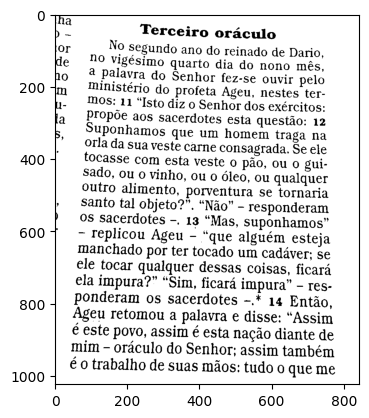

In [8]:
imgProcessada = imgTrasholding
imgProcessada = dilatarImg(imgProcessada, iterations=1)

mostrar(imgProcessada)

## Separar Caracteres

### Segmentação Processada

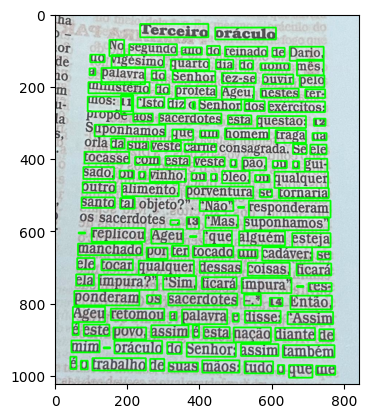

In [9]:
mostrar(palavraBlocoImg(imgProcessada.copy(), (0, 255, 0), img=img.copy()))

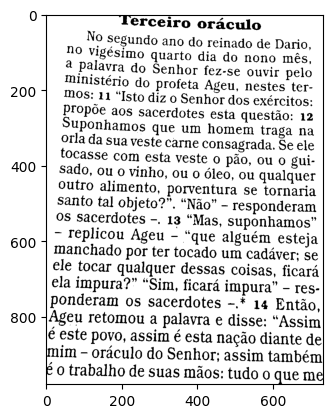

['TFerceiro oráculo\nNÇ) Segundo ano do reinado de Dario,\nno vigésimo quarto dia do nono mês,\nà palavra do Senhor fez-se ouvir pelo\nministério do profeta Ageu, nestes ter-\nmos: 11 “Isto diz o Senhor dos exércitos:\nPTropõe aos sacerdotes esta questão: 12\nuponhamos que um homem traga na\noTla da sua veste carne consagrada. Se ele\ntocasse com esta veste o pão, ou o gui-\nSado, ou o vinho, ou o óleo, ou qualquer\noutro alimento, porventura se tornaria\nSanto tal objeto?”. “Não” — responderam\n0S sacerdotes -. 13 “Mas, suponhamos”\n- replicou Ageu - “que alguém esteja\nmanchado por ter tocado um cadáver; se\nele tocar qualquer dessas coisas, ficará\nela impura?” “Sim, ficará impura” - res-\nponderam os sacerdotes -.* 14 Então,\nAgeu retomou a palavra e disse: “Assim\né este povo, assim é esta nação diante de\nmim - oráculo do Senhor; assim também\né o trabalho de suas mãos: tudo o que me\n']


In [10]:
dadosImg= pegarDados(imgProcessada)
segmento = list()
segmentoTxt = list()

for i in range(len(dadosImg['text'])):
    (x, y, w, h) = (dadosImg['left'][i], dadosImg['top'][i], dadosImg['width'][i], dadosImg['height'][i])
    corteImg = imgProcessada[y:y+h, x:x+w]
    if dadosImg['level'][i] == 2:
        segmento.append(corteImg)
       
        #print(img_dict['text'][i])
        segmentoTemp= ocr(corteImg)
        i=0
        while segmentoTemp=='' and i<=10:
            corteImg=imgProcessada[y-i:y+h+i,x-i:x+w+i]
            
            segmentoTemp= ocr(corteImg)
            i=i+1
        mostrar(corteImg)
        segmentoTxt.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxt)
# segmentoTxt.pop()

### Segmentação Original

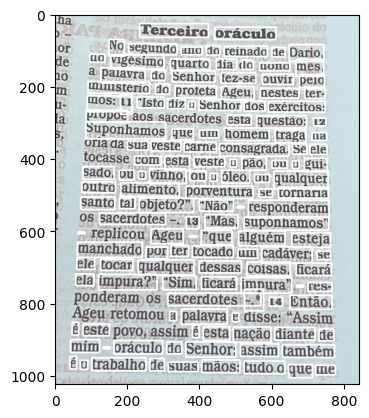

In [11]:
mostrar(palavraBlocoImg(img.copy(), (255,255,255)))

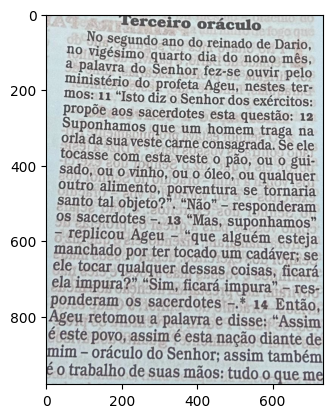

['Terceiro oráculo\nNo segundo ano do reinado de Dario,\n\nno vigésimo quarto dia do nono mês,\nà palavra do Senhor fez-se ouvir pelo\nministério do profeta Ageu, nestes ter-\nmos: 11 “Isto diz o Senhor dos exércitos:\nPropõe aos sacerdotes esta questão: 12\nuponhamos que um homem traga na\norlada sua veste carne consagrada. Se ele\ntocásse com esta veste o pão, ou o gui-\nSado, ou o vinho, ou o óleo, ou qualquer\noutro alimento, porventura se tornaria\nsanto tal objeto?”, “Não” — responderam\noS Sacerdotes -. 13 “Mas, suponhamos”\n7 Teplicou Ageu — “que alguém esteja\nmanchado por ter tocado um cadáver; se\nele tocar qualquer dessas coisas, ficará\nela impura?” “Sim, ficará impura” - res-\nPponderam,os sacerdotes -.* 14 Então,\nAgeu;retomou a palavra e disse::“Assim\né este povo; assim é esta nação diante de\nmim - oráculo do Senhor; assim também\né o trabalho de suas mãos: tudo.o que me\n']


In [12]:
dadosImgOriginal= pegarDados(img)
segmentoOriginal = list()
segmentoTxtOriginal = list()

for i in range(len(dadosImgOriginal['text'])):
    (x, y, w, h) = (dadosImgOriginal['left'][i], dadosImgOriginal['top'][i], dadosImgOriginal['width'][i], dadosImgOriginal['height'][i])
    corteImg = img[y:y+h, x:x+w]
    if dadosImgOriginal['level'][i] == 2:
        segmentoOriginal.append(corteImg)
        mostrar(corteImg)
        #print(img_dict['text'][i])
        segmentoTemp= ocr(corteImg)
        segmentoTxtOriginal.append(segmentoTemp)
        # print(segment_txt)
print(segmentoTxtOriginal)

## OCR

In [13]:
textImgOriginal = ocr(img)
textImgProcessada = ocr(imgProcessada)
segmentoTxt = ' '.join(segmentoTxt)
segmentoTxtOriginal = ' '.join(segmentoTxtOriginal)



In [14]:
print(textImgOriginal)

Terceiro oráculo
No segundo ano do reinado de Dario,
no vigésimo quarto dia do nono mês,
à palavra do Senhor fez-se ouvir pelo
ministério do profeta Ageu, nestes ter-
mos: 11 “Isto diz o Senhor dos exércitos:
Propõe aos sacerdotes esta questão: 12
Suponhamos que um homem traga na
orlada sua veste carne consagrada. Se ele
tocásse com: esta veste o pão, ou o gui-
Sado, ou o vinho, ou o óleo, ou qualquer
outro alimento, porventura se tornaria
santo tal objeto?”. “Não” — responderam
oS Sacerdotes -. 13 “Mas, suponhamos”
7 Teplicou Ageu — “que alguém esteja
manchado por ter tocado um cadáver; se
ele tocar qualquer dessas coisas, ficará
ela impura?” “Sim, ficará impura” - res-
Pponderam,os sacerdotes -.* 14 Então,
Ageu;retomou a palavra e disse::“Assim
é este povo; assim é esta nação diante de
mim - oráculo do Senhor; assim também
é o trabalho de suas mãos: tudo.o que me



In [15]:
print(textImgProcessada)

Terceiro oráculo
NÇ) Segundo ano do reinado de Dario,
no vigésimo quarto dia do nono mês,
à palavra do Senhor fez-se ouvir pelo
ministério do profeta Ageu, nestes ter-
mos: 11 “Isto diz o Senhor dos exércitos:
PTropõe aos sacerdotes esta questão: 12
uponhamos que um homem traga na
oTla da sua veste carne consagrada. Se ele
tocasse com esta veste o pão, ou o gui-
Sado, ou o vinho, ou o óleo, ou qualquer
outro alimento, porventura se tornaria
Santo tal objeto?”. “Não” — responderam
0S sacerdotes -. 13 “Mas, suponhamos”
- replicou Ageu - “que alguém esteja
manchado por ter tocado um cadáver; se
ele tocar qualquer dessas coisas, ficará
ela impura?” “Sim, ficará impura” - res-
ponderam os sacerdotes -.* 14 Então,
Ageu retomou a palavra e disse: “Assim
é este povo, assim é esta nação diante de
mim - oráculo do Senhor; assim também
é o trabalho de suas mãos: tudo o que me



In [16]:
print(segmentoTxt)

TFerceiro oráculo
NÇ) Segundo ano do reinado de Dario,
no vigésimo quarto dia do nono mês,
à palavra do Senhor fez-se ouvir pelo
ministério do profeta Ageu, nestes ter-
mos: 11 “Isto diz o Senhor dos exércitos:
PTropõe aos sacerdotes esta questão: 12
uponhamos que um homem traga na
oTla da sua veste carne consagrada. Se ele
tocasse com esta veste o pão, ou o gui-
Sado, ou o vinho, ou o óleo, ou qualquer
outro alimento, porventura se tornaria
Santo tal objeto?”. “Não” — responderam
0S sacerdotes -. 13 “Mas, suponhamos”
- replicou Ageu - “que alguém esteja
manchado por ter tocado um cadáver; se
ele tocar qualquer dessas coisas, ficará
ela impura?” “Sim, ficará impura” - res-
ponderam os sacerdotes -.* 14 Então,
Ageu retomou a palavra e disse: “Assim
é este povo, assim é esta nação diante de
mim - oráculo do Senhor; assim também
é o trabalho de suas mãos: tudo o que me



In [17]:
print(segmentoTxtOriginal)

Terceiro oráculo
No segundo ano do reinado de Dario,

no vigésimo quarto dia do nono mês,
à palavra do Senhor fez-se ouvir pelo
ministério do profeta Ageu, nestes ter-
mos: 11 “Isto diz o Senhor dos exércitos:
Propõe aos sacerdotes esta questão: 12
uponhamos que um homem traga na
orlada sua veste carne consagrada. Se ele
tocásse com esta veste o pão, ou o gui-
Sado, ou o vinho, ou o óleo, ou qualquer
outro alimento, porventura se tornaria
santo tal objeto?”, “Não” — responderam
oS Sacerdotes -. 13 “Mas, suponhamos”
7 Teplicou Ageu — “que alguém esteja
manchado por ter tocado um cadáver; se
ele tocar qualquer dessas coisas, ficará
ela impura?” “Sim, ficará impura” - res-
Pponderam,os sacerdotes -.* 14 Então,
Ageu;retomou a palavra e disse::“Assim
é este povo; assim é esta nação diante de
mim - oráculo do Senhor; assim também
é o trabalho de suas mãos: tudo.o que me



## Pos-Processamento

### Texto imagem Original


In [18]:
textOriginalPos = removerEspaçoDuplo(textImgOriginal)
textOriginalPos=removerNumeros(textOriginalPos)
textOriginalPos = removerLetraSolo(textOriginalPos, keep_e=True, keep_a=True)
print(textOriginalPos)

Terceiro oráculo No segundo ano do reinado de Dario, no vigésimo quarto dia do nono mês, à palavra do Senhor fez-se ouvir pelo ministério do profeta Ageu, nestes ter- mos:  “Isto diz  Senhor dos exércitos: Propõe aos sacerdotes esta questão:  Suponhamos que um homem traga na orlada sua veste carne consagrada. Se ele tocásse com: esta veste  pão, ou  gui- Sado, ou  vinho, ou  óleo, ou qualquer outro alimento, porventura se tornaria santo tal objeto?”. “Não” — responderam oS Sacerdotes -.  “Mas, suponhamos”  Teplicou Ageu — “que alguém esteja manchado por ter tocado um cadáver; se ele tocar qualquer dessas coisas, ficará ela impura?” “Sim, ficará impura” - res- Pponderam,os sacerdotes -.*  Então, Ageu;retomou a palavra e disse::“Assim é este povo; assim é esta nação diante de mim - oráculo do Senhor; assim também é  trabalho de suas mãos: tudo. que me 


### Texto da imagem Original Segmentada

In [19]:
segmentoTxtOriginalPos = removerQuebra(segmentoTxtOriginal, add_space=True)
segmentoTxtOriginalPos = removerNumeros(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerEspaçoDuplo(segmentoTxtOriginalPos)
segmentoTxtOriginalPos = removerLetraSolo(segmentoTxtOriginalPos)
print(segmentoTxtOriginalPos)

Terceiro oráculo No segundo ano do reinado de Dario, no vigésimo quarto dia do nono mês, palavra do Senhor fez-se ouvir pelo ministério do profeta Ageu, nestes ter- mos: “Isto diz Senhor dos exércitos: Propõe aos sacerdotes esta questão: uponhamos que um homem traga na orlada sua veste carne consagrada. Se ele tocásse com esta veste pão, ou gui- Sado, ou vinho, ou óleo, ou qualquer outro alimento, porventura se tornaria santo tal objeto?”, “Não” — responderam oS Sacerdotes -. “Mas, suponhamos” Teplicou Ageu — “que alguém esteja manchado por ter tocado um cadáver; se ele tocar qualquer dessas coisas, ficará ela impura?” “Sim, ficará impura” - res- Pponderam,os sacerdotes -.* Então, Ageu;retomou palavra disse::“Assim este povo; assim esta nação diante de mim - oráculo do Senhor; assim também trabalho de suas mãos: tudo.que me 


### Texto da Imgem Processada


In [20]:
textImgProcessadaPos = removerEspaçoDuplo(textImgProcessada)
textImgProcessadaPos=removerNumeros(textImgProcessadaPos)
textImgProcessadaPos = removerLetraSolo(textImgProcessadaPos, keep_e=True, keep_a=True, keep_o=True)
print(textImgProcessadaPos)

Terceiro oráculo NÇ) Segundo ano do reinado de Dario, no vigésimo quarto dia do nono mês, à palavra do Senhor fez-se ouvir pelo ministério do profeta Ageu, nestes ter- mos:  “Isto diz o Senhor dos exércitos: PTropõe aos sacerdotes esta questão:  uponhamos que um homem traga na oTla da sua veste carne consagrada. Se ele tocasse com esta veste o pão, ou o gui- Sado, ou o vinho, ou o óleo, ou qualquer outro alimento, porventura se tornaria Santo tal objeto?”. “Não” — responderam  sacerdotes -.  “Mas, suponhamos” - replicou Ageu - “que alguém esteja manchado por ter tocado um cadáver; se ele tocar qualquer dessas coisas, ficará ela impura?” “Sim, ficará impura” - res- ponderam os sacerdotes -.*  Então, Ageu retomou a palavra e disse: “Assim é este povo, assim é esta nação diante de mim - oráculo do Senhor; assim também é o trabalho de suas mãos: tudo o que me 


### Texto da imagem Processada e Segmentada

In [21]:
segmentoTxtPos = removerEspaçoDuplo(segmentoTxt)
segmentoTxtPos = removerNumeros(segmentoTxtPos)
segmentoTxtPos = removerLetraSolo(segmentoTxtPos)
print(segmentoTxtPos)

TFerceiro oráculo NÇ) Segundo ano do reinado de Dario, no vigésimo quarto dia do nono mês, palavra do Senhor fez-se ouvir pelo ministério do profeta Ageu, nestes ter- mos:  “Isto diz Senhor dos exércitos: PTropõe aos sacerdotes esta questão:  uponhamos que um homem traga na oTla da sua veste carne consagrada. Se ele tocasse com esta veste pão, ou gui- Sado, ou vinho, ou óleo, ou qualquer outro alimento, porventura se tornaria Santo tal objeto?”. “Não” — responderam sacerdotes -.  “Mas, suponhamos” - replicou Ageu - “que alguém esteja manchado por ter tocado um cadáver; se ele tocar qualquer dessas coisas, ficará ela impura?” “Sim, ficará impura” - res- ponderam os sacerdotes -.*  Então, Ageu retomou palavra disse: “Assim este povo, assim esta nação diante de mim - oráculo do Senhor; assim também trabalho de suas mãos: tudo que me 
